EMPLOYEE CHURN PREDICTION SYSTEM


In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
Churn_data =pd.DataFrame()

In [3]:
Churn_data = pd.read_csv( "/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv" )

In [4]:
Churn_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

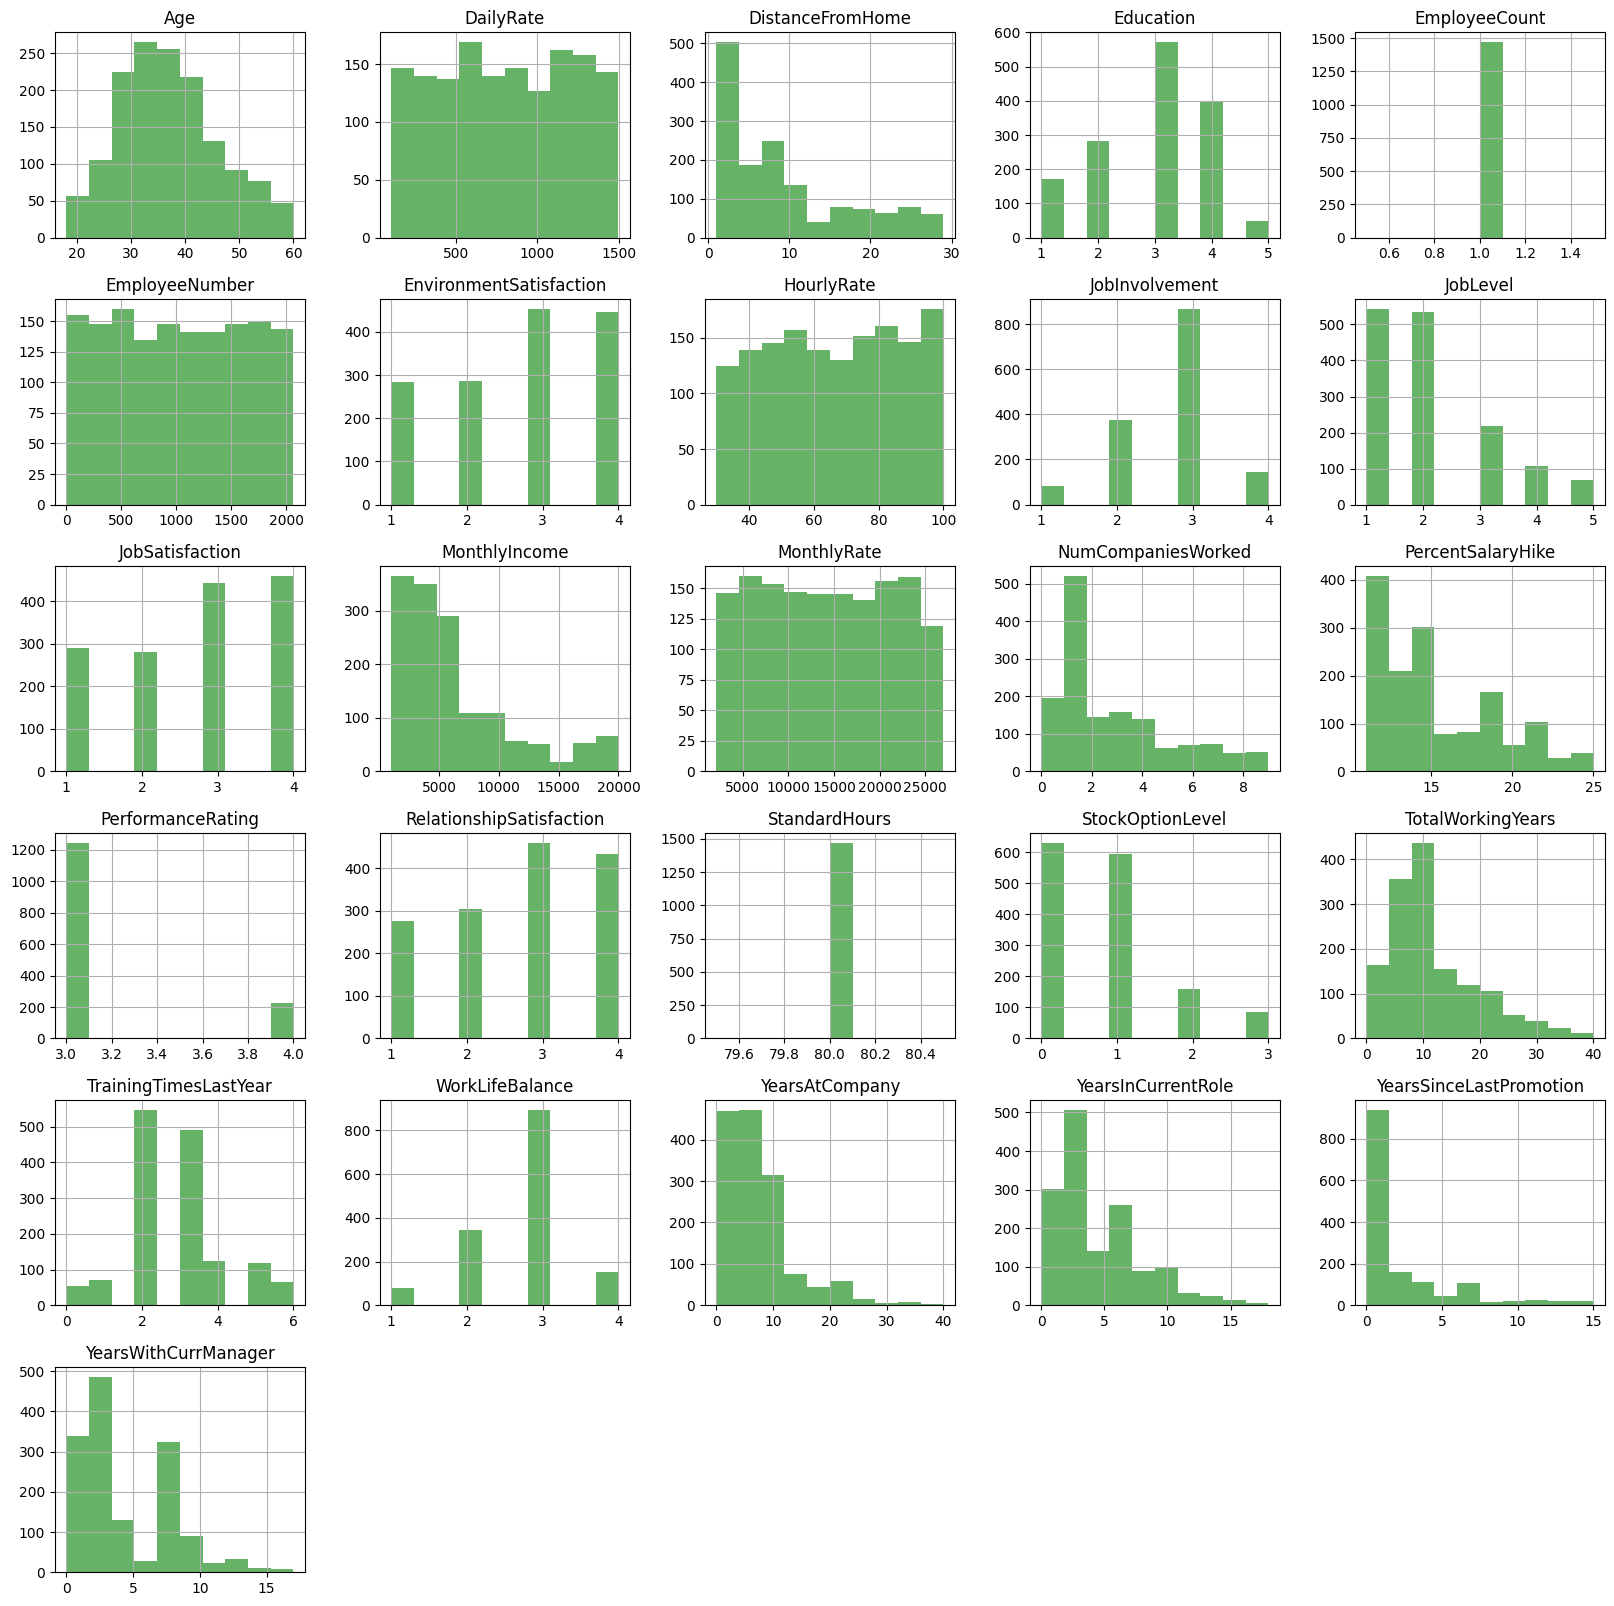

In [6]:
Churn_data.hist(figsize=(20,20),color='g',alpha=0.6)

PRE-PROCESSING OF THE DATA


In [7]:
# checking null values
Churn_data.isnull()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
Churn_data=Churn_data[["Age","Attrition","Department","DistanceFromHome","EducationField","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MaritalStatus","MonthlyIncome","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","YearsSinceLastPromotion","TrainingTimesLastYear","WorkLifeBalance"]]

In [9]:
# converting the categorical value to nominal
Churn_data['Attrition'] = Churn_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
Churn_data['OverTime'] = Churn_data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
Churn_data.head()     #attrition==1 implies left the company  and if 0 then stayed. (output variable)

,Age,Attrition,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsSinceLastPromotion,TrainingTimesLastYear,WorkLifeBalance
0,41,1,Sales,1,Life Sciences,2,94,3,2,4,...,8,1,11,3,1,0,8,0,0,1
1,49,0,Research & Development,8,Life Sciences,3,61,2,2,2,...,1,0,23,4,4,1,10,1,3,3
2,37,1,Research & Development,2,Other,4,92,2,1,3,...,6,1,15,3,2,0,7,0,3,3
3,33,0,Research & Development,3,Life Sciences,4,56,3,1,3,...,1,1,11,3,3,0,8,3,3,3
4,27,0,Research & Development,2,Medical,1,40,3,1,2,...,9,0,12,3,4,1,6,2,3,3


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


le.fit(Churn_data["Department"])
Churn_data["Department"] = le.transform(Churn_data["Department"])

le.fit(Churn_data["EducationField"])
Churn_data["EducationField"] = le.transform(Churn_data["EducationField"])

le.fit(Churn_data["MaritalStatus"])
Churn_data["MaritalStatus"] = le.transform(Churn_data["MaritalStatus"])



<Axes: >

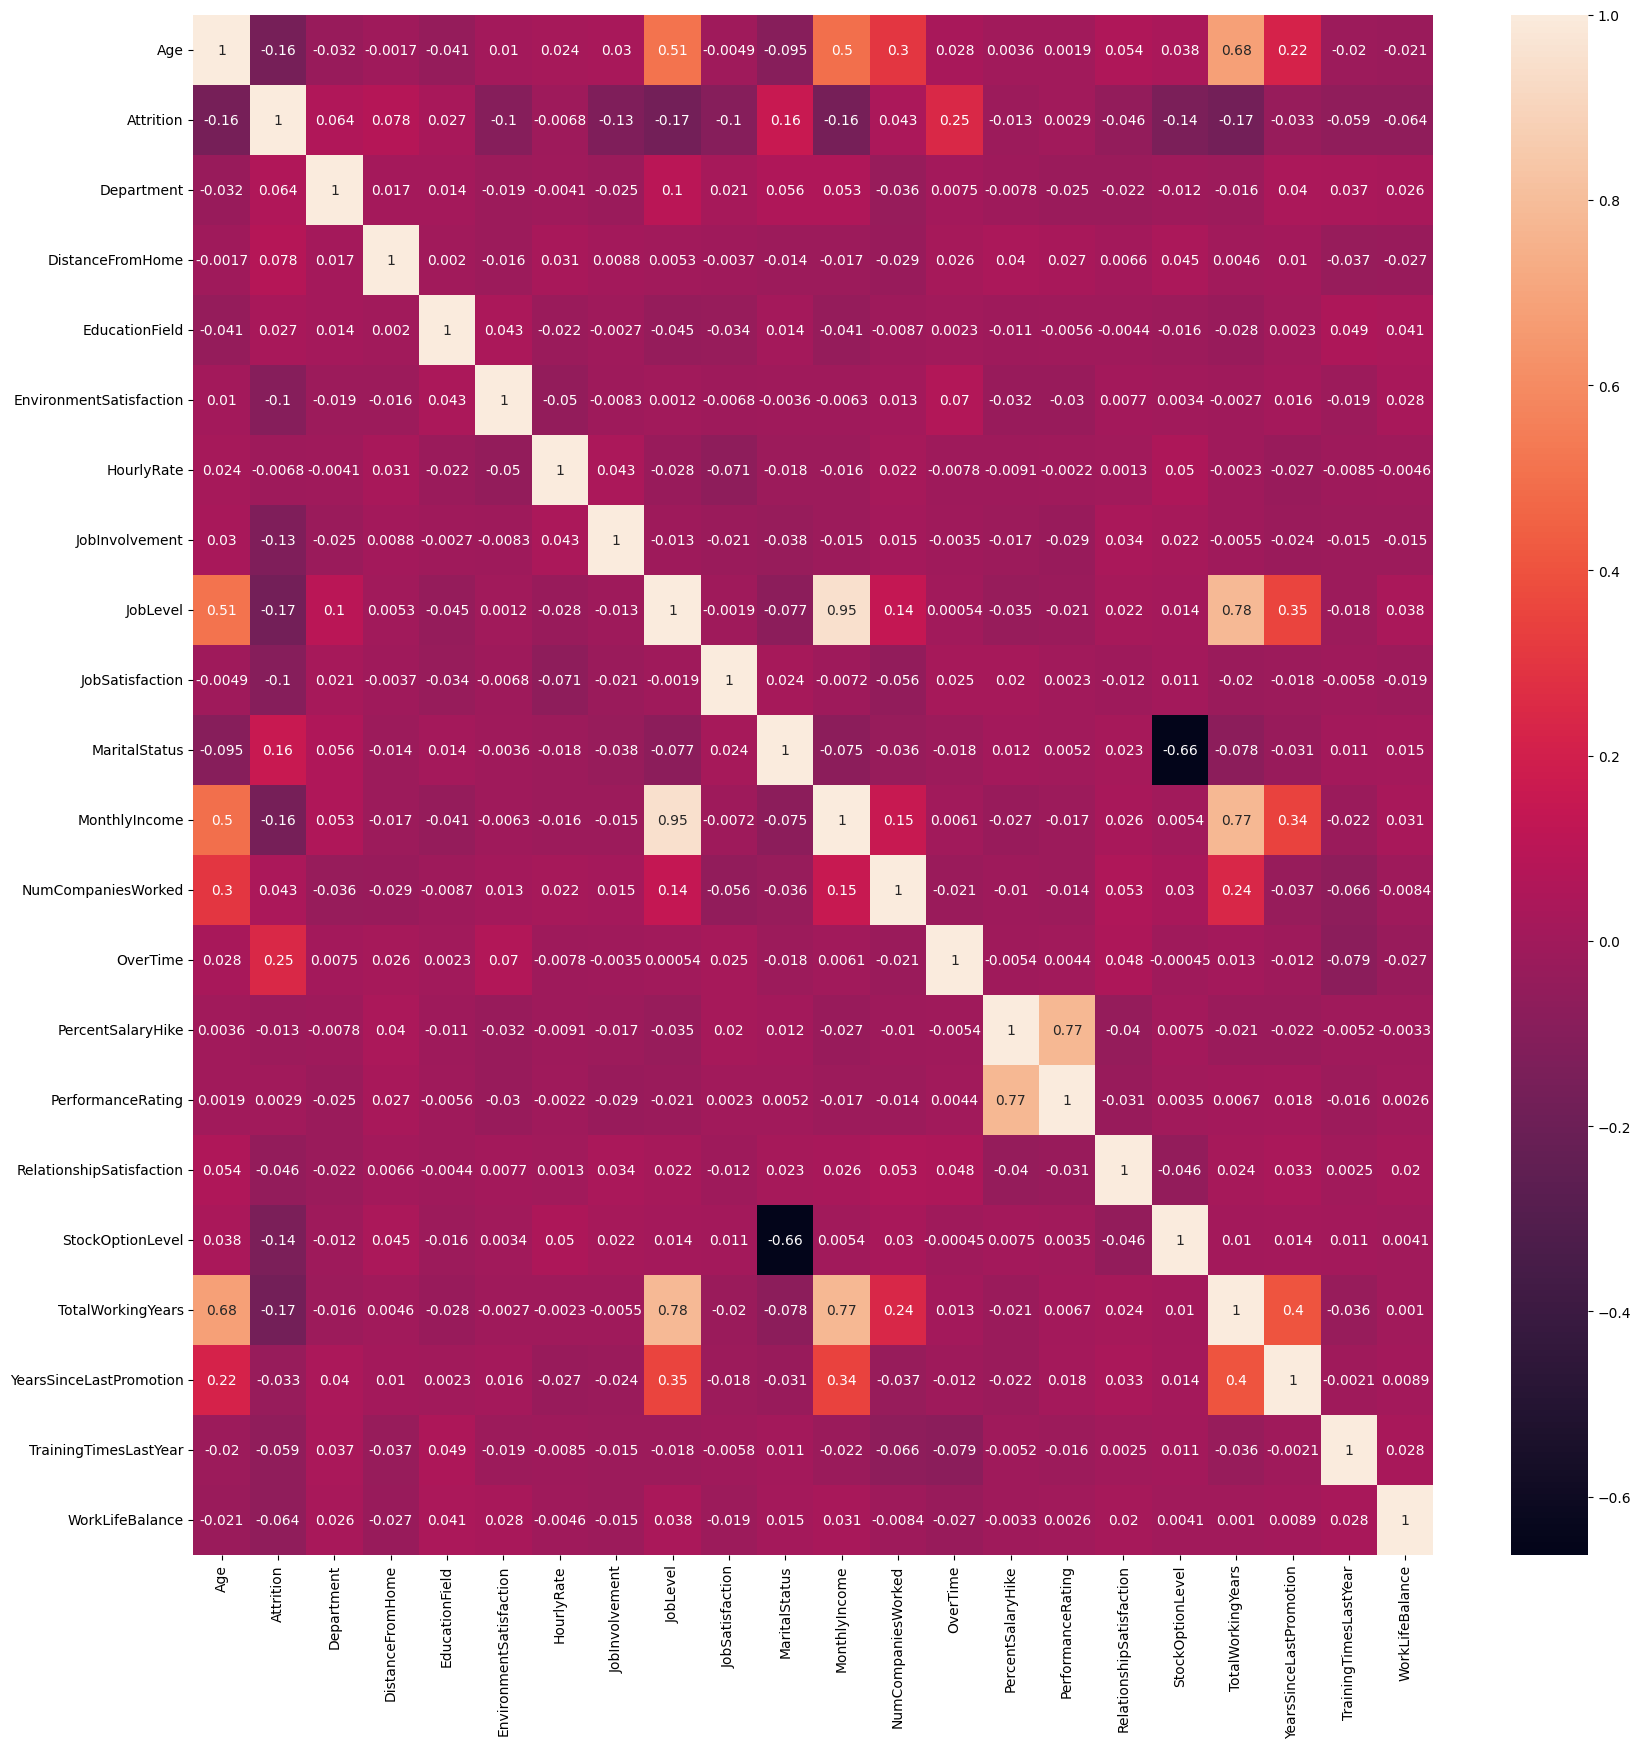

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations=Churn_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,annot=True)

In [13]:
# since monthly income and job level are correlated with value 0.95 . hence dropping job level
Churn_data.drop(["JobLevel"],axis=1,inplace=True)

<Axes: >

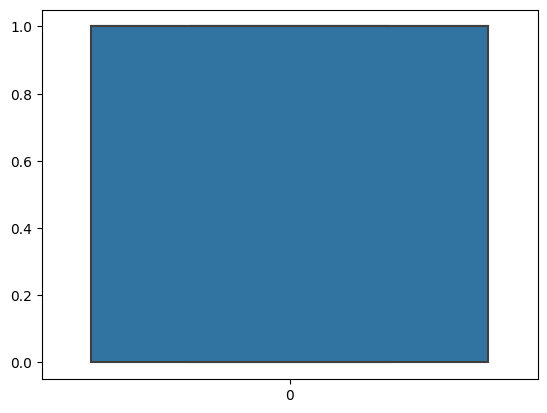

In [14]:
# Outlier Analysis
sns.boxplot(Churn_data.all())

In [15]:
# MinMaxScaler: This scales the data to a specific range, usually between 0 and 1. It's useful to preserve the shape of the original distribution.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Churn_data["DistanceFromHome"]=scaler.fit_transform(Churn_data["DistanceFromHome"].values.reshape(-1, 1)).flatten()
Churn_data["MonthlyIncome"]=scaler.fit_transform(Churn_data["MonthlyIncome"].values.reshape(-1, 1)).flatten()
Churn_data["NumCompaniesWorked"]=scaler.fit_transform(Churn_data["NumCompaniesWorked"].values.reshape(-1, 1)).flatten()
Churn_data["PercentSalaryHike"]=scaler.fit_transform(Churn_data["PercentSalaryHike"].values.reshape(-1, 1)).flatten()
Churn_data["TotalWorkingYears"]=scaler.fit_transform(Churn_data["TotalWorkingYears"].values.reshape(-1, 1)).flatten()
Churn_data["YearsSinceLastPromotion"]=scaler.fit_transform(Churn_data["YearsSinceLastPromotion"].values.reshape(-1, 1)).flatten()

In [16]:
y=Churn_data["Attrition"]
x=Churn_data.drop(["Attrition"],axis=1)

Logistic Regression


In [17]:
import numpy as np

class LogisticRegressionFromScratch:
    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'n_iterations': self.n_iterations}

    def __init__(self, learning_rate=0.04, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None   #(beta1-n)
        self.beta0 = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.beta0 = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.beta0
            predictions = self.sigmoid(model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.beta0 -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.beta0
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]
    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)


    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


Random Forest

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class RandomForest:

    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def bootstrapping(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.Series(y)

        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self.bootstrapping(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0))

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        return {'n_trees': self.n_trees, 'max_depth': self.max_depth}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


KNN

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score

class KNN:
    def get_params(self, deep=True):
        return {'k': self.k}
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        if isinstance(X, np.ndarray):

            X = pd.DataFrame(X)
            y = pd.Series(y)
        self.X_train = X.values
        self.y_train = y.values

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X.values]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



Naive Bayes

In [20]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters["mean" + str(c)] = X_c.mean(axis=0)
            self.parameters["var" + str(c)] = X_c.var(axis=0)

    def _pdf(self, X, class_label):
        mean = self.parameters["mean" + str(class_label)]
        var = self.parameters["var" + str(class_label)]
        numerator = np.exp(- (X - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(np.sum(y == c) / len(y))
            posterior = np.sum(np.log(self._pdf(X, c)), axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        return {}

    def set_params(self, **params):
        return self


In [21]:

from sklearn.model_selection import GridSearchCV
params = {
    'random_forest': {
        'model': RandomForest(),
        'params': {
            'n_trees': [1, 5, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegressionFromScratch(),
        'params': {
            'learning_rate': [0.01, 0.04, 0.1],
            'n_iterations': [500, 1000, 1500]
        }
    },
    'knn': {
        'model': KNN(),
        'params': {
            'k': [3, 5, 7]
        }
    },
    'naive_bayes': {
        'model': GaussianNaiveBayes(),
        'params': {}
    }
}

scores = []

for model_name, mp in params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df




/tmp/ipykernel_18/2506683923.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_18/2506683923.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_18/2506683923.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


,model,best_score,best_params
0,random_forest,0.854422,"{'max_depth': 10, 'n_trees': 100}"
1,logistic_regression,0.839456,"{'learning_rate': 0.04, 'n_iterations': 500}"
2,knn,0.832653,{'k': 7}
3,naive_bayes,0.860544,{}


In [22]:
best_model_row = df.loc[df['best_score'].idxmax()]

best_model_name = best_model_row['model']
best_model_params = best_model_row['best_params']

best_model_instance = params[best_model_name]['model']

best_model_instance.set_params(**best_model_params)

best_model_instance.fit(x, y)



Customised Testing After selecting the Model.

In [23]:
import pandas as pd

user_test_data = pd.DataFrame({
   'Age': [50],
    'Department': [1],
    'DistanceFromHome': [5.5],
    'EducationField': [2],
    'EnvironmentSatisfaction': [1],
    'HourlyRate': [7],
    'JobInvolvement': [1],
    'JobSatisfaction': [4],
    'MaritalStatus': [1],
    'MonthlyIncome': [5000],
    'NumCompaniesWorked': [2],
    'OverTime': [1],
    'PercentSalaryHike': [1],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [1],
    'StockOptionLevel': [1],
    'TotalWorkingYears': [0],
    'YearsSinceLastPromotion': [0],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [2]
})

predictions = best_model_instance.predict(user_test_data)

# Display the predictions
print("Predictions:", predictions)
if (predictions==1):
  print("Employee will leave.")
else:
  print("Employee will stay")

Predictions: [0]
Employee will stay


/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
